# Geometric Brownian Motion
---
- stochastic process to help better define and expound upon Black-Scholes Model 

### Import *py* Libraries

import CONFIG as c
import BLACK_SCHOLES as bs

In [27]:
import CONFIG as c 
import BLACK_SCHOLES as bs 

### Import Libraries

In [28]:
import pandas as pd
import numpy as np 
import datetime as dt

import matplotlib.pyplot as plt 

---
---
## Stochastic Differential Equation: 
---
---
#### Function: `dSt = r*Stdt + sigma*StdZt`
##### Variables: 
> - St: index level at date *t*
> - r: risk-free rate
> - sigma: volatility 
> - Z: standard normally distributed random variable 

In [29]:
import BROWNIAN as b

In [30]:
# MarketEnvironment
def env_creation(day1,initval,volly,lastday,curr,freq,pth):
    me_gbm = b.MarketEnvironment('me_gbm', dt.datetime(2020,1,1))

    me_gbm.add_constant('initial_value',36)
    me_gbm.add_constant('volatility', 0.1)
    me_gbm.add_constant('final_date', dt.datetime(2020,12,31))
    me_gbm.add_constant('currency', 'EUR')
    me_gbm.add_constant('frequency', 'M')
    me_gbm.add_constant('paths', pth)

    # ConstantShortRate
    csr = b.ConstantShortRate('csr', 0.05)
    me_gbm.add_curve('discount_curve', csr) 
    
    return me_gbm


prepped_env = env_creation(dt.datetime(2020,1,1),36,0.1,dt.datetime(2020,12,31),'EUR','M',10000)
prepped_env

In [31]:
# GeometricBrownian Motion
def brownie(prepped_market_environment):
    gbm = b.GeometricBrownianMotion('gbm', prepped_market_environment)

    gbm.generate_time_grid()
    paths_1 = gbm.get_instrument_values()
    gbm.update(volatility=0.5)
    paths_2 = gbm.get_instrument_values(fixed_seed=False)

    return paths_1, paths_2, gbm 

plotting_brownie1, plotting_brownie2, new_brownies = brownie(prepped_env)
#print('uno: \n',plotting_brownie1)
#print('dos: \n',plotting_brownie2)
print(new_brownies)

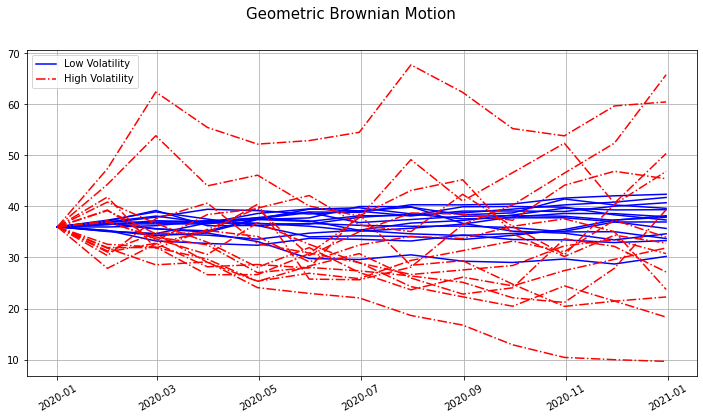

In [32]:
def plotting(uno, dos, market, filename, exportFig=False):
    plt.figure(figsize=(12,6))
    p1 = plt.plot(market.time_grid, uno[:,:15], 'b')
    p2 = plt.plot(market.time_grid, dos[:,:15], 'r-.')

    plt.grid(True)
    plt.legend([p1[0],p2[0]],['Low Volatility', 'High Volatility'],loc=2)
    plt.suptitle("Geometric Brownian Motion",fontsize=15)
    plt.xticks(rotation=30)

    if exportFig == True: 
        plt.savefig('brownieCharts/png/{}.png'.format(filename)) #no title/tick marks
        plt.savefig('brownieCharts/pdf/{}.pdf'.format(filename)) #title and tick marks
        plt.savefig('brownieCharts/svg/{}.svg'.format(filename)) #able to zoom
        plt.savefig('brownieCharts/jpeg/{}.jpeg'.format(filename)) #title and tick marks 
    else:
        plt.show()

plotting(plotting_brownie1, plotting_brownie2, new_brownies, 'example',exportFig=True)